<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/02-hierarchical-clustering/Hierarchical_Clustering_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To appreicate the bells and whistles of hierarchical clustering, it is best to first play with some synthetic data. Let's create some 2D data.

## Let's create some data

In [ ]:
import pandas as pd
import random
import numpy as np

Cluster 1

<Axes: xlabel='x', ylabel='y'>

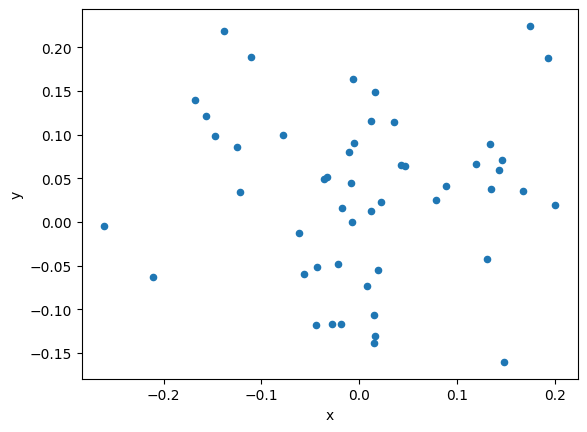

In [ ]:
# Some parameters to control the cluster
points = 50
mu_x = 0
sigma_x = 0.1
mu_y = 0
sigma_y = 0.1
x = np.random.normal(mu_x, sigma_x, points)
y = np.random.normal(mu_y, sigma_y, points)

df = pd.DataFrame({'x': x, 'y': y})

df.plot.scatter(x='x', y='y')

Let's create another cluster

<Axes: xlabel='x', ylabel='y'>

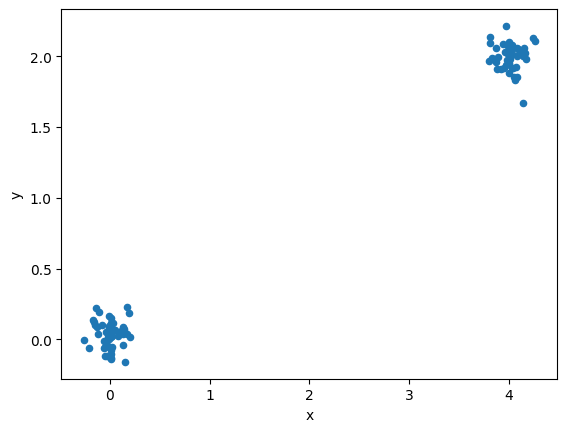

In [ ]:
points = 50
mu_x = 4
sigma_x = 0.1
mu_y = 2
sigma_y = 0.1
x = np.random.normal(mu_x, sigma_x, points)
y = np.random.normal(mu_y, sigma_y, points)

temp_df = pd.DataFrame({'x': x, 'y': y})
df = pd.concat([df, temp_df], axis=0)

df.plot.scatter(x='x', y='y')

## Cluster Analysis

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns

Always a good idea to put the parameters of interest in their own cell.

In [ ]:
num_clusters = 2
method = 'single'

First calculate the proximity matrix

In [ ]:
Z = linkage(df, method) # 'ward' 'complete' 'single' 'average' centroid,

Z

array([[5.00000000e+00, 2.30000000e+01, 3.69062769e-03, 2.00000000e+00],
       [4.10000000e+01, 4.50000000e+01, 4.12657655e-03, 2.00000000e+00],
       [6.60000000e+01, 7.90000000e+01, 4.69104127e-03, 2.00000000e+00],
       [5.00000000e+01, 5.70000000e+01, 6.73913509e-03, 2.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 8.19197635e-03, 2.00000000e+00],
       [1.90000000e+01, 2.20000000e+01, 9.46037157e-03, 2.00000000e+00],
       [5.80000000e+01, 7.30000000e+01, 1.03160020e-02, 2.00000000e+00],
       [8.80000000e+01, 9.80000000e+01, 1.08708854e-02, 2.00000000e+00],
       [6.40000000e+01, 7.70000000e+01, 1.12689128e-02, 2.00000000e+00],
       [7.20000000e+01, 9.10000000e+01, 1.14190490e-02, 2.00000000e+00],
       [2.80000000e+01, 3.90000000e+01, 1.15594862e-02, 2.00000000e+00],
       [1.70000000e+01, 2.90000000e+01, 1.16117427e-02, 2.00000000e+00],
       [8.40000000e+01, 9.20000000e+01, 1.47652476e-02, 2.00000000e+00],
       [6.00000000e+00, 1.60000000e+01, 1.48190112e

Now, do the clustering based on the proximity matrix.

In [ ]:
df['cluster_labels'] = fcluster(Z, num_clusters, criterion='maxclust')

Plot the clustering

<Axes: xlabel='x', ylabel='y'>

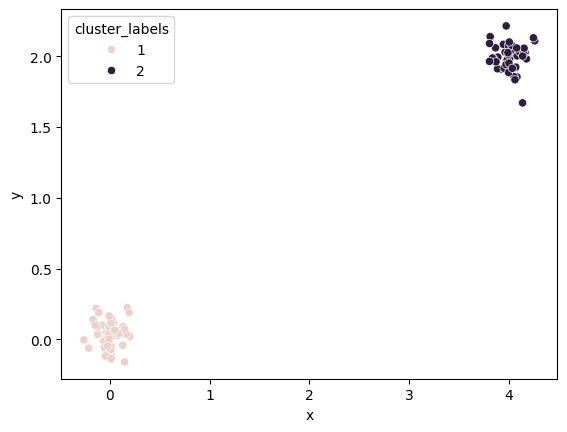

In [ ]:
sns.scatterplot(x='x', y='y', hue='cluster_labels', data = df)

Plot the dendrogram

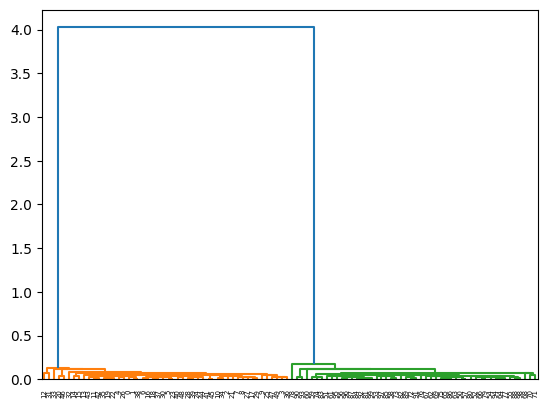

In [ ]:
from scipy.cluster.hierarchy import dendrogram

_ = dendrogram(Z)

##Things we could try:



1.   What if we make the data 3D?
2.   What if we make the data non-Gaussian?
3.   Trying different densities, sizes, etc.

